<H1>Marco Teorico: Clustering y Algoritmos No Supervisados (K-Means, PCA) </H1>

### **1. Introducción al Clustering y Algoritmos No Supervisados**

El clustering es una técnica fundamental en el aprendizaje no supervisado, que tiene como objetivo agrupar un conjunto de datos en clusters o grupos, de manera que los datos dentro de cada grupo sean más similares entre sí que con los datos en otros grupos. Los algoritmos no supervisados, como K-Means y el Análisis de Componentes Principales (PCA), son herramientas poderosas para la exploración y el análisis de datos cuando no se cuenta con etiquetas de clase predefinidas.

### **2. Clustering con K-Means**

**2.1 Concepto**

K-Means es un algoritmo de clustering que busca dividir un conjunto de datos en \( K \) grupos (clusters) distintos basándose en la similitud entre los datos. El algoritmo trabaja minimizando la suma de las distancias cuadradas entre los puntos de datos y el centroide del cluster al que pertenecen.

**2.2 Funcionamiento**

1. **Inicialización**: Selección de \( K \) puntos iniciales como los centroides de los clusters.
2. **Asignación**: Cada punto de datos se asigna al cluster cuyo centroide esté más cercano.
3. **Actualización**: Los centroides de los clusters se recalculan como la media de todos los puntos asignados a cada cluster.
4. **Repetición**: Los pasos de asignación y actualización se repiten hasta que los centroides ya no cambian significativamente o se alcanza un número máximo de iteraciones.

**2.3 Ventajas y Desventajas**

- **Ventajas**: Simplicidad, eficiencia en términos de tiempo y espacio, fácil de interpretar.
- **Desventajas**: Requiere la especificación del número de clusters \( K \), sensible a la inicialización y a los outliers, no maneja bien clusters de formas no esféricas.

### **3. Reducción de Dimensionalidad con Análisis de Componentes Principales (PCA)**

**3.1 Concepto**

El PCA es una técnica de reducción de dimensionalidad que transforma los datos a un nuevo sistema de coordenadas donde las nuevas dimensiones (componentes principales) son ordenadas de acuerdo a la cantidad de varianza que explican en los datos originales. El objetivo es reducir el número de dimensiones mientras se conserva la mayor parte posible de la variabilidad en los datos.

**3.2 Funcionamiento**

1. **Normalización**: Se estandarizan los datos para que cada característica tenga media cero y varianza uno.
2. **Cálculo de Covarianza**: Se calcula la matriz de covarianza para determinar la relación entre las características.
3. **Descomposición de Eigenvalores y Eigenvectores**: Se obtienen los eigenvectores (componentes principales) y eigenvalores (importancia) de la matriz de covarianza.
4. **Selección de Componentes**: Se seleccionan las componentes principales que explican la mayor parte de la varianza y se proyectan los datos originales en estas componentes.

**3.3 Ventajas y Desventajas**

- **Ventajas**: Reducción de dimensionalidad, mejora del rendimiento de algoritmos de clustering y clasificación, eliminación de ruido y redundancia.
- **Desventajas**: Puede ser difícil de interpretar, la pérdida de algunas características puede llevar a la pérdida de información relevante.

### **4. Evaluación de Clusters**

**4.1 Inercia**

La inercia, o suma de las distancias cuadradas entre los puntos de datos y sus centroides, mide la cohesión dentro de los clusters. Menores valores de inercia indican clusters más compactos.

**4.2 Silhouette Score**

El Silhouette Score mide la calidad de los clusters en función de la distancia promedio entre los puntos dentro del mismo cluster y la distancia promedio entre puntos de clusters diferentes. Los valores varían entre -1 y 1:
- **1**: Los puntos están bien agrupados.
- **0**: Los puntos están en la frontera entre clusters.
- **-1**: Los puntos están mal agrupados.

**4.3 Consideraciones**

Ambas métricas, inercia y Silhouette Score, ayudan a evaluar la adecuación del número de clusters y la calidad del clustering, siendo complementarias en el análisis.

<H1>Módulo 9: Clustering y Algoritmos No Supervisados (K-Means, PCA) </H1>

**Conceptos clave:**

Clustering con K-Means.
Reducción de dimensionalidad con Análisis de Componentes Principales (PCA).
Evaluación de clusters: Inercia, Silhouette Score.
    
**Proyecto: Segmentación de clientes con K-Means.**
    
Utilizar un dataset de clientes para segmentarlos en grupos con K-Means. Reducir la dimensionalidad del dataset con PCA y visualizar los resultados.

**1. Importación de Librerías
python**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

**2. Carga del Dataset**

In [16]:
url = '/home/julio/jupyter_files/Curso_ML/Mall_Customers.csv'
data = pd.read_csv(url)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**3. Preprocesamiento con Pipelines**

Define las columnas numéricas y categóricas.

In [19]:
# Definir las columnas numéricas y categóricas
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_features = ['Gender']

Crear los pipelines para preprocesamiento.

In [20]:
# Crear un pipeline para preprocesamiento numérico
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes
    ('scaler', StandardScaler())  # Normalizar los datos
])

# Crear un pipeline para preprocesamiento categórico
categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))  # Codificar variables categóricas
])

# Crear un preprocesador que aplica los pipelines a las columnas correspondientes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

In [21]:
#Aplicar el preprocesamiento al dataset.

In [22]:
# Preprocesar los datos
data_preprocessed = preprocessor.fit_transform(data)

**4. Reducción de Dimensionalidad con PCA**

In [23]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_preprocessed)

# Crea un DataFrame con los datos reducidos
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])


In [24]:
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance}")
print(f"Varianza acumulada: {np.cumsum(explained_variance)}")

Varianza explicada por cada componente: [0.4095285 0.3081674]
Varianza acumulada: [0.4095285 0.7176959]


**5. Segmentación de Clientes con K-Means**

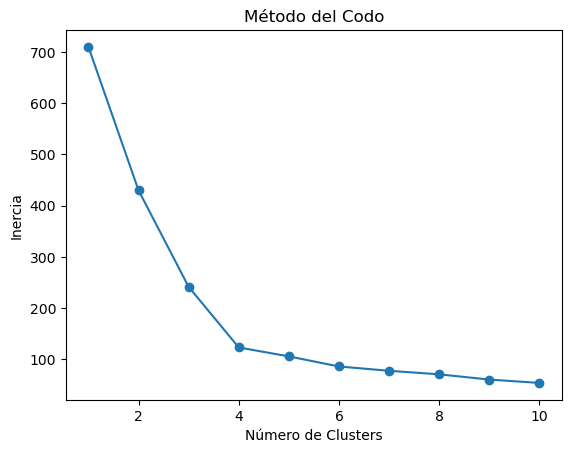

In [31]:
#Encuentra el número óptimo de clusters usando el método del codo.
inertia_values = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data_pca_df)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [32]:
#Aplica K-Means con el número óptimo de clusters.
optimal_clusters = 4  # Cambia esto según el método del codo
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data_pca_df['Cluster'] = kmeans.fit_predict(data_pca_df)

# Añade la columna de clusters al DataFrame original
data['Cluster'] = data_pca_df['Cluster']


In [33]:
#Evalúa la calidad de los clusters usando el Silhouette Score.
sil_score = silhouette_score(data_pca_df[['PC1', 'PC2']], data_pca_df['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.423258467397591


**7. Visualización de los Resultados**

In [34]:
#Visualiza los clusters en el espacio de las componentes principales.

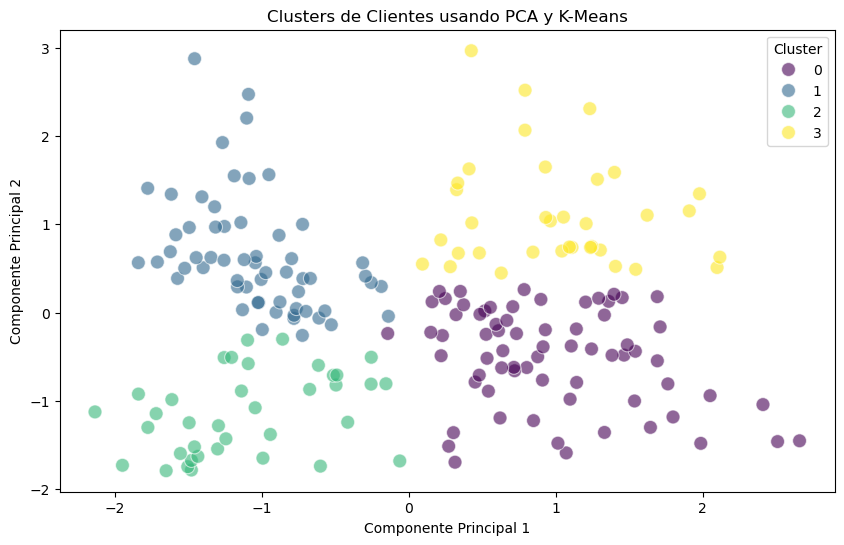

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.6)
plt.title('Clusters de Clientes usando PCA y K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

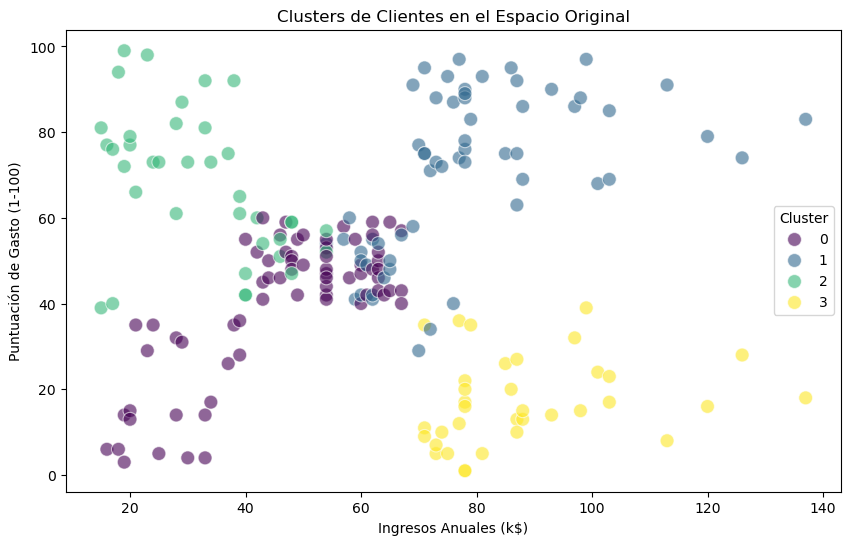

In [36]:
#Visualiza el resultado en el dataset original.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.6)
plt.title('Clusters de Clientes en el Espacio Original')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.legend(title='Cluster')
plt.show()